In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.shape

(8693, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train.isnull().mean().mul(100)

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [8]:
train[train.isnull().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [9]:
# dataframe null values (%)
(2087/8693)*100

24.007822385827676

## Categorical Values

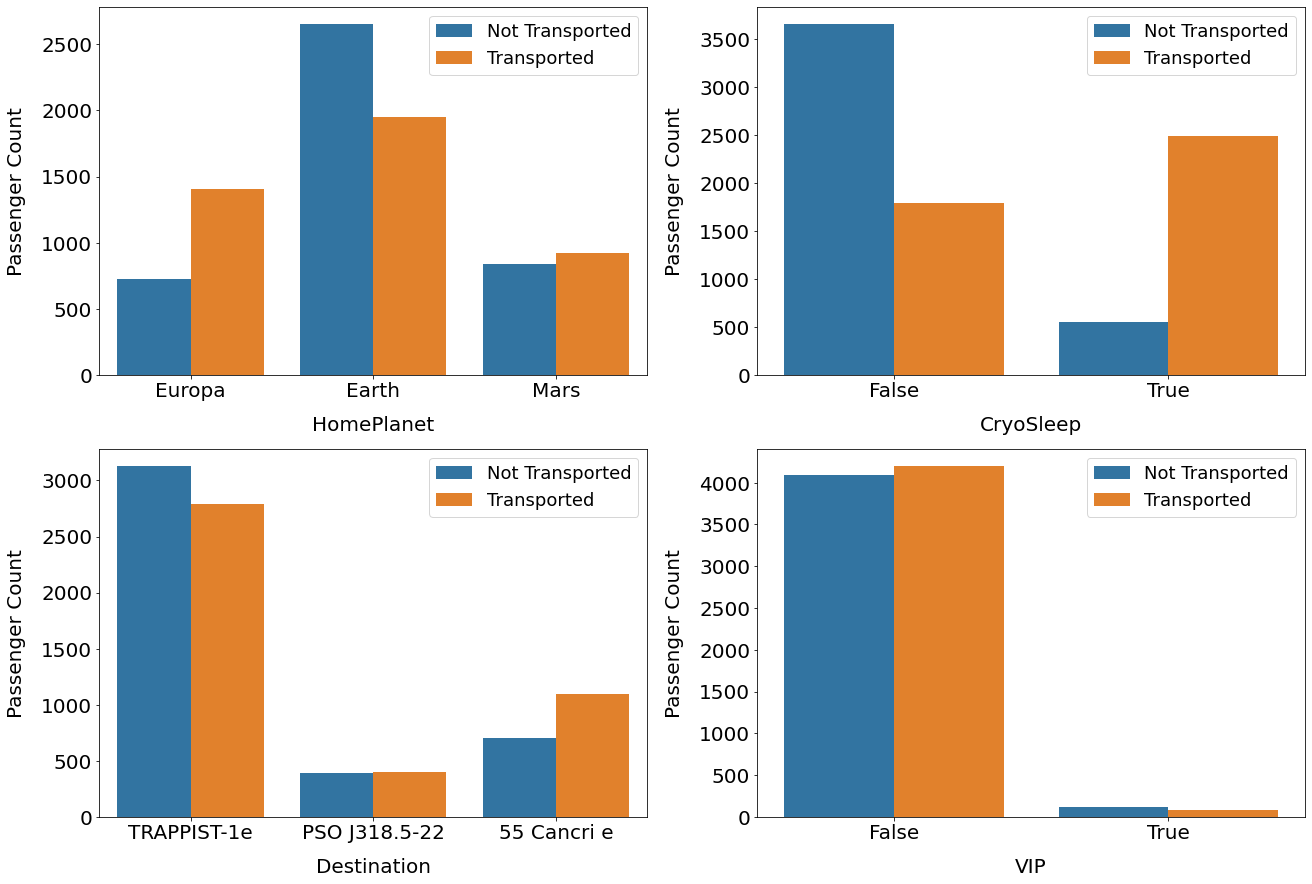

In [10]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
plt.subplots_adjust(right=1.8, top=1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='Transported', data=train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Transported', 'Transported'], loc='upper right', prop={'size': 18})

plt.show()

## Data Preprocessing

In [11]:
df = train.copy()

In [12]:
numerical_columns = [column for column in train.columns
                     if train[column].dtype in ["int64", "float64"]]

In [13]:
numerical_preprocessor = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                                        ("scaler", StandardScaler())])

In [14]:
categorical_preprocessor = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),
                                           ("onehot", OneHotEncoder(handle_unknown="ignore"))])

In [15]:
preprocessor = ColumnTransformer(transformers=[("numerical_preprocessor",
                                               numerical_preprocessor,
                                               numerical_columns),
                                              ("categorical_preprocessor",
                                               categorical_preprocessor, ['HomePlanet', 'CryoSleep', 
                                                                     'Destination', 'VIP']
                                              )])

In [16]:
df = pd.DataFrame(preprocessor.fit_transform(df))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8693 non-null   float64
 1   1       8693 non-null   float64
 2   2       8693 non-null   float64
 3   3       8693 non-null   float64
 4   4       8693 non-null   float64
 5   5       8693 non-null   float64
 6   6       8693 non-null   float64
 7   7       8693 non-null   float64
 8   8       8693 non-null   float64
 9   9       8693 non-null   float64
 10  10      8693 non-null   float64
 11  11      8693 non-null   float64
 12  12      8693 non-null   float64
 13  13      8693 non-null   float64
 14  14      8693 non-null   float64
 15  15      8693 non-null   float64
dtypes: float64(16)
memory usage: 1.1 MB


In [24]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.711945,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.334037,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2.036857,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.293552,-0.333105,0.523010,0.336851,2.687176,-0.092818,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.891895,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [18]:
df2 = df.merge(train['Transported'], how='left', left_index=True, right_index=True)

In [19]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Transported
0,0.711945,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,False
1,-0.334037,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,True
2,2.036857,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,False
3,0.293552,-0.333105,0.523010,0.336851,2.687176,-0.092818,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,False
4,-0.891895,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,True


## XGBoost Model

In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
X = df2.drop('Transported', axis=1)
y = df2['Transported']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
# Initialize XGB
xgb = XGBClassifier(booster='gbtree', max_depth=4, learning_rate=0.1, n_estimators=300, random_state=2, n_jobs=-1)

# Fit XGB to traning set
xgb.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = xgb.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score*100))

Score: 80.54277828886845
